In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/home/rgold/Documents/Python_Practice/hands_on-boosting/Data_Wrangling/bike/bike_day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [6]:
df['day'] = df['dteday'].dt.day

In [7]:
df = df.drop(['instant', 'casual', 'registered', 'dteday'], axis=1)

In [8]:
df.to_csv('bike_day-clean.csv')

Text(0.5, 1.0, '2012 Correlation Heatmap')

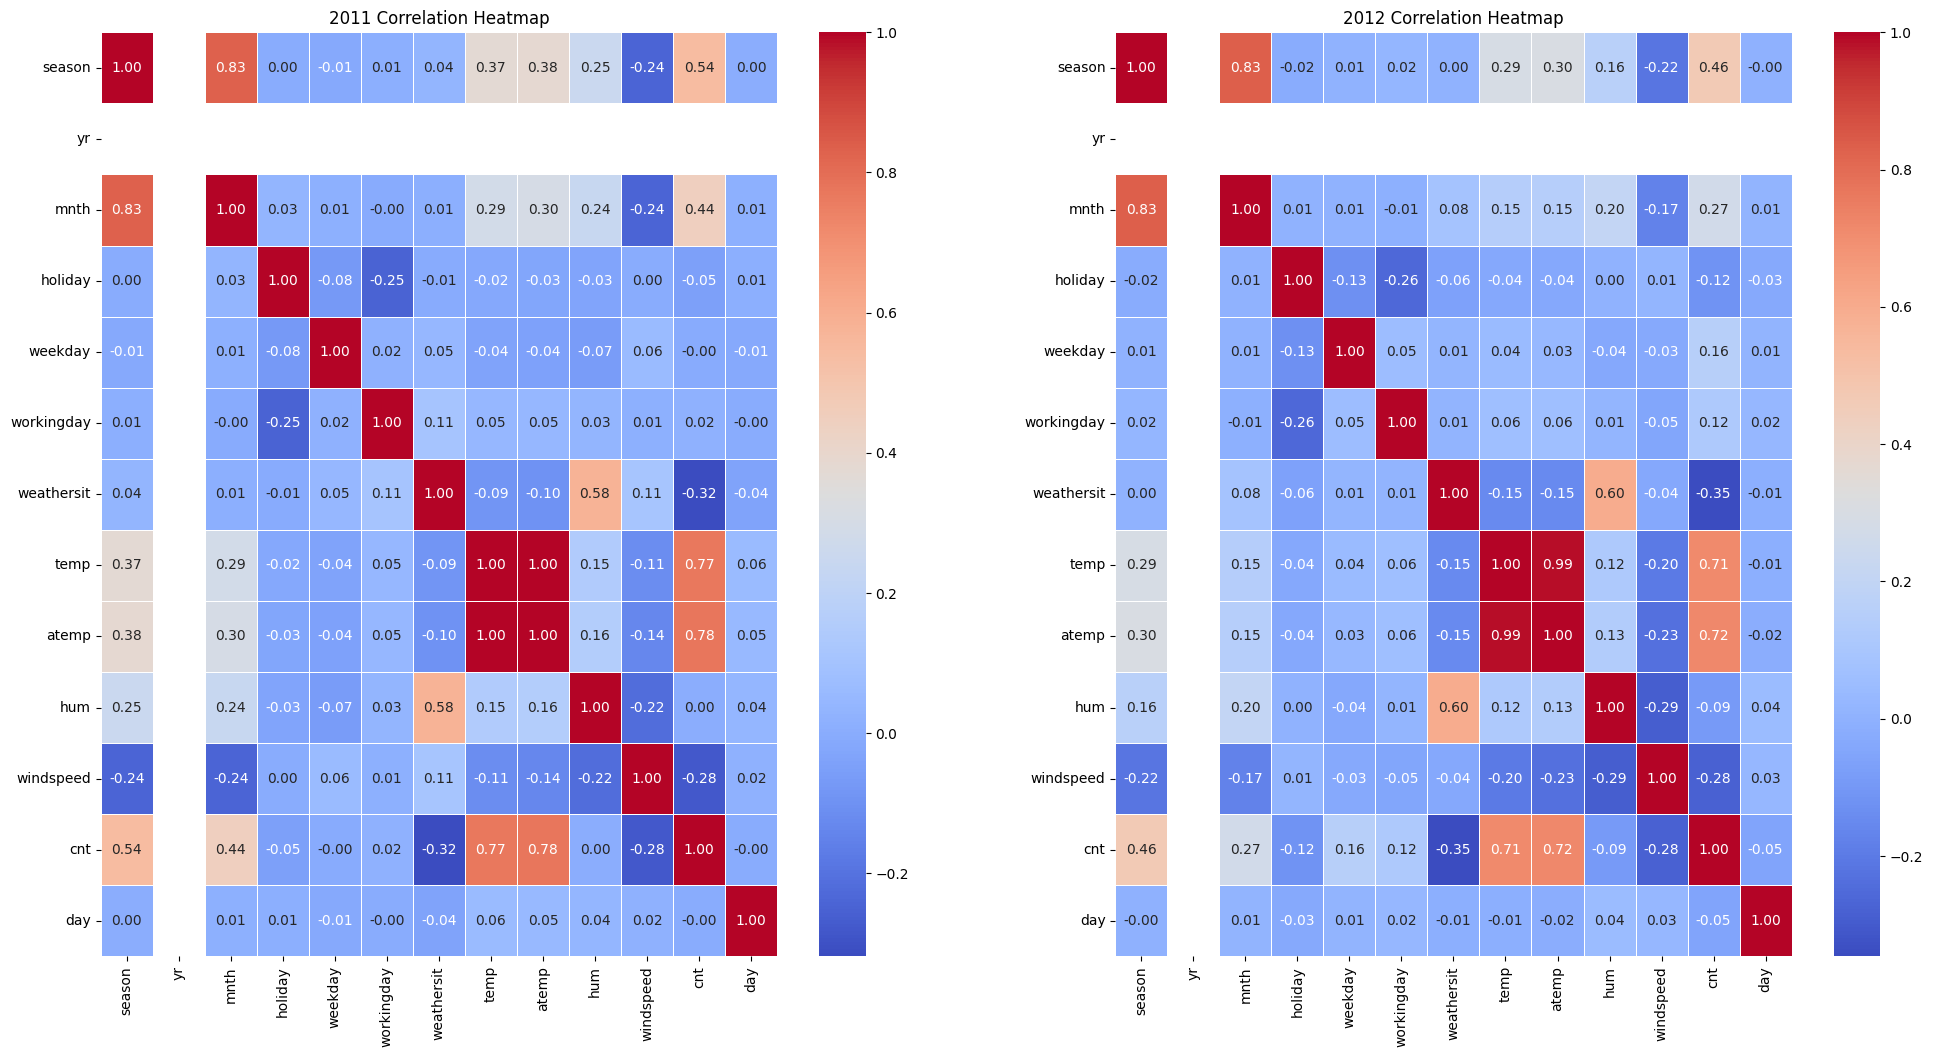

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(24,12))
sns.heatmap(df.where(df['yr'] == 0).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('2011 Correlation Heatmap')
sns.heatmap(df.where(df['yr'] == 1).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('2012 Correlation Heatmap')

In [10]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lin_reg.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [35]:
print('RMSE: {:0.2f}'.format(rmse))

RMSE: 782.65


In [37]:
scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=10)
rmse2 = np.sqrt(-scores)

In [39]:
print('RMSE: ', np.round(rmse2, 2))

RMSE:  [ 506.88  841.85 1142.15  728.32  640.32  968.9  1135.14 1252.03 1081.73
 1429.57]


In [38]:
print('RMSE mean: {:0.2f}'.format(rmse2.mean()))

RMSE mean: 972.69


## XGBoost Regressor

In [47]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred2 = xgb_reg.predict(X_test)

In [51]:
mse3 = mean_squared_error(y_test, y_pred2)
rmse3 = np.sqrt(mse3)

In [52]:
print('RMSE: {:0.2f}'.format(rmse3))

RMSE: 639.54


In [53]:
scores2 = cross_val_score(xgb_reg, X, y, scoring='neg_mean_squared_error', cv=10)
rmse4 = np.sqrt(-scores2)

In [54]:
print('RMSE: ', np.round(rmse4, 2))

RMSE:  [ 951.63  905.81  546.53  837.23  792.63  859.2  1068.93  917.58  755.76
 1167.22]


In [55]:
print('RMSE mean: {:0.2f}'.format(rmse4.mean()))

RMSE mean: 880.25


## R2 Score

In [58]:
r2 = r2_score(y_test, y_pred)
print('R2 Score (LinearRegression): {:0.2f}'.format(r2))

R2 Score (LinearRegression): 0.86


In [59]:
r2_2 = r2_score(y_test, y_pred2)
print('R2 Score (XGBRegressor): {:0.2f}'.format(r2_2))

R2 Score (XGBRegressor): 0.91


## Plotting The Models

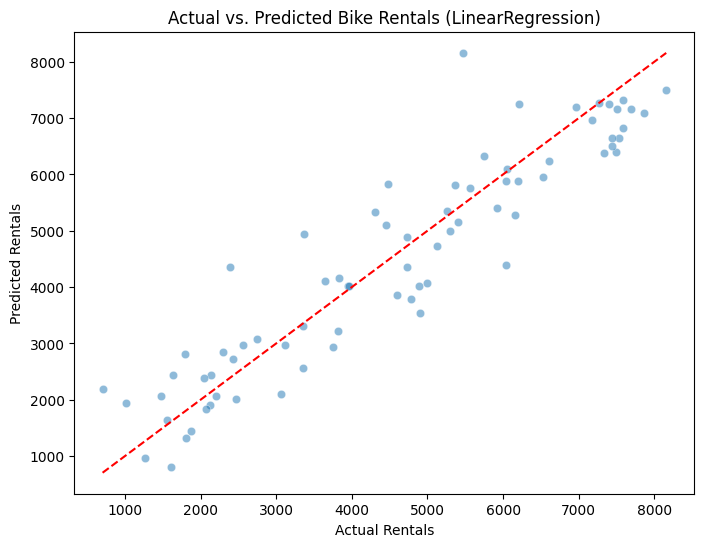

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs. Predicted Bike Rentals (LinearRegression)')
plt.show()

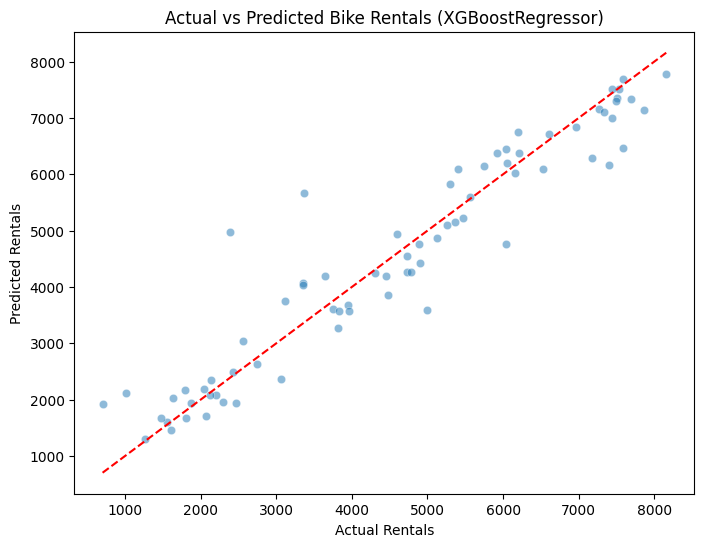

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Bike Rentals (XGBoostRegressor)')
plt.show()

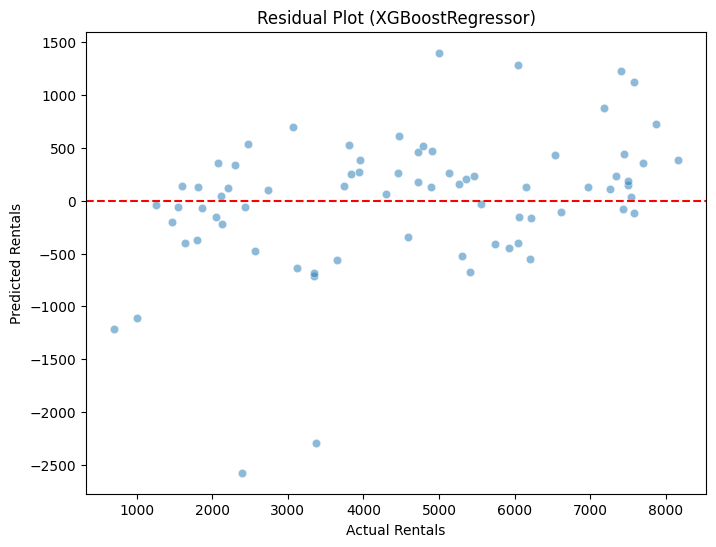

In [86]:
residuals2 = y_test - y_pred2

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals2, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Residual Plot (XGBoostRegressor)')
plt.show()